# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [52]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [53]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Set kelvin value at 0 celius
kelvin = 273.15

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": (city_max_temp - kelvin), # Also converted Kelvin to celius
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": pd.to_datetime(city_date, unit='s').date()  # Convert Unix timestamp to human-readable date
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount isa
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | al hayy
Processing Record 9 of Set 1 | flying fish cove
Processing Record 10 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 11 of Set 1 | ola
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | vrangel'
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | benjamin constant
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | minas de marcona
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | kuta
Processing Record 20 of Set 1 | belaya kholunitsa
Processing Record 21 of Set 1 | smithe

In [54]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [55]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount isa,-20.7333,139.5000,25.87,83,40,4.12,AU,2024-02-13
1,port-aux-francais,-49.3500,70.2167,8.16,91,100,10.98,TF,2024-02-13
2,puerto ayora,-0.7393,-90.3518,26.42,100,78,2.24,EC,2024-02-13
3,albany,42.6001,-73.9662,0.49,78,100,0.89,US,2024-02-13
4,hermanus,-34.4187,19.2345,23.78,71,39,5.14,ZA,2024-02-13


In [56]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount isa,-20.7333,139.5000,25.87,83,40,4.12,AU,2024-02-13
1,port-aux-francais,-49.3500,70.2167,8.16,91,100,10.98,TF,2024-02-13
2,puerto ayora,-0.7393,-90.3518,26.42,100,78,2.24,EC,2024-02-13
3,albany,42.6001,-73.9662,0.49,78,100,0.89,US,2024-02-13
4,hermanus,-34.4187,19.2345,23.78,71,39,5.14,ZA,2024-02-13


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

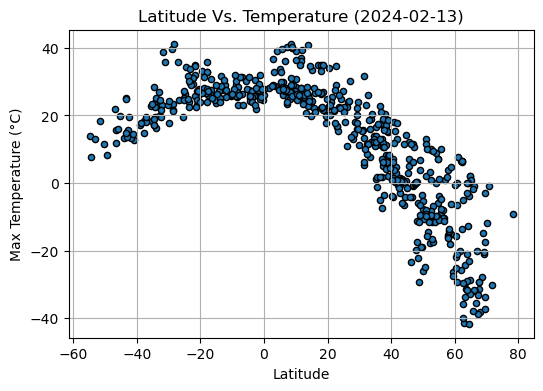

In [58]:
# Build scatter plot for latitude vs. temperature 
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(6,4), edgecolors="black", title=f"Latitude Vs. Temperature ({city_data_df['Date'].iloc[0]})")

# Set x and y-axis labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

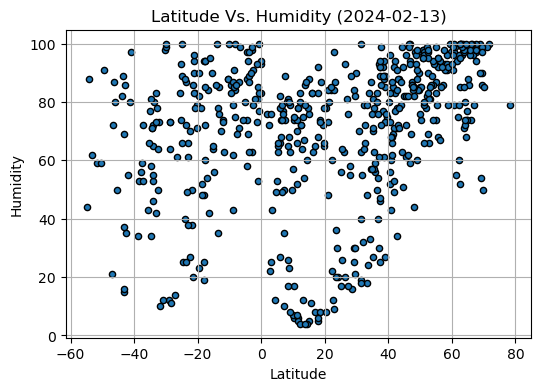

In [59]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(6,4), edgecolors="black", title=f"Latitude Vs. Humidity ({city_data_df['Date'].iloc[0]})")

# Set x and y-axis labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

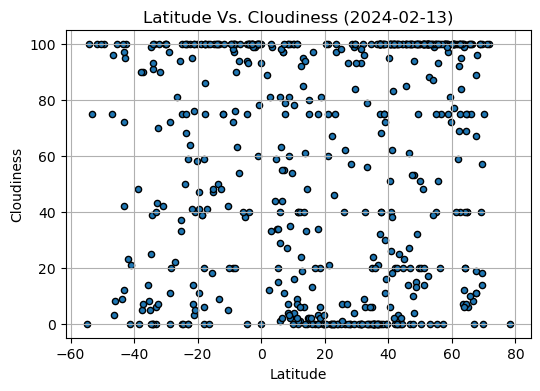

In [60]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(6,4), edgecolors="black", title=f"Latitude Vs. Cloudiness ({city_data_df['Date'].iloc[0]})")

# Set x and y-axis labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

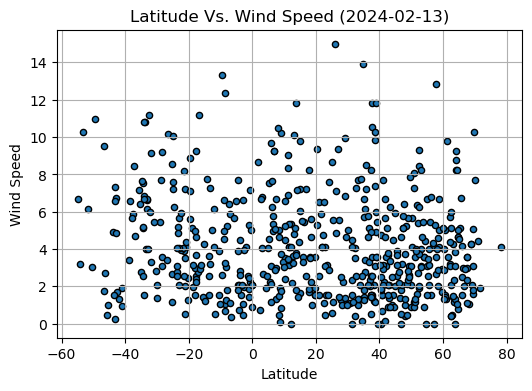

In [69]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(6,4), edgecolors="black", title=f"Latitude Vs. Wind Speed ({city_data_df['Date'].iloc[0]})")

# Set x and y-axis labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [97]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(10,10),fontsize=15,color="red")

    # Label plot
    # plt.xlabel(x_values)
    # plt.ylabel(y_values)

    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Show plot
    plt.show()

In [98]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,albany,42.6001,-73.9662,0.49,78,100,0.89,US,2024-02-13
7,al hayy,32.1735,46.0433,23.22,32,100,4.04,IQ,2024-02-13
9,ola,59.5833,151.2833,-26.28,97,72,2.93,RU,2024-02-13
10,longyearbyen,78.2186,15.6401,-9.09,79,0,4.12,SJ,2024-02-13
11,vrangel',42.7297,133.0839,1.40,71,0,3.67,RU,2024-02-13


In [99]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount isa,-20.7333,139.5000,25.87,83,40,4.12,AU,2024-02-13
1,port-aux-francais,-49.3500,70.2167,8.16,91,100,10.98,TF,2024-02-13
2,puerto ayora,-0.7393,-90.3518,26.42,100,78,2.24,EC,2024-02-13
4,hermanus,-34.4187,19.2345,23.78,71,39,5.14,ZA,2024-02-13
5,adamstown,-25.0660,-130.1015,24.73,89,100,7.57,PN,2024-02-13


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7670680024343463


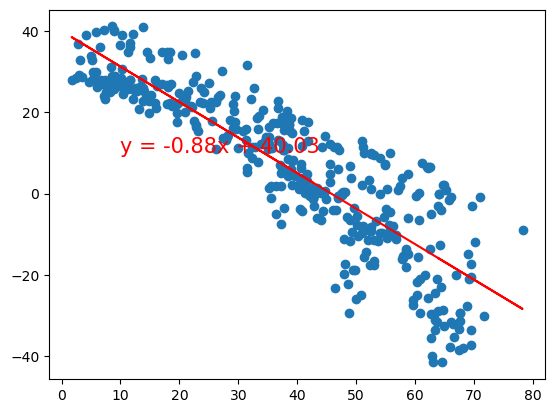

In [100]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temperature (°C)", "Latitude Vs. Max Temperature Linear Regression", (10, 20))


R squared: 0.3478794228409076


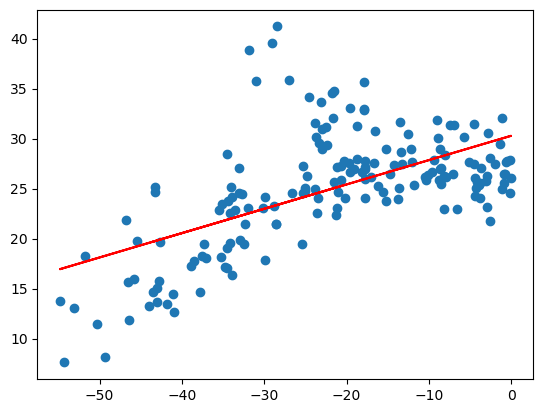

In [102]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temperature (°C)", "Latitude Vs. Max Temperature Linear Regression", (10, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.283546827597768


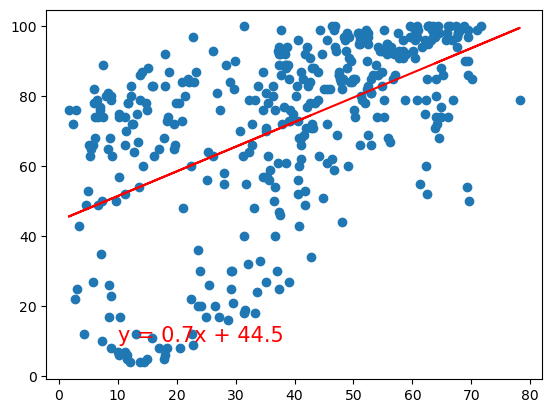

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Latitude Vs. Humidity Linear Regression", (10, 20))

R squared: 0.12084651316775039


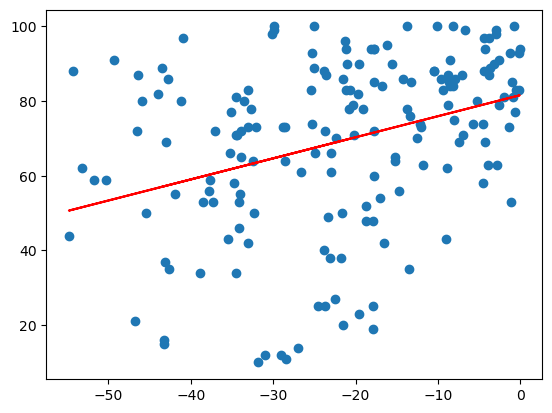

In [105]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Latitude Vs. Humidity Linear Regression", (10, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.06847900904814085


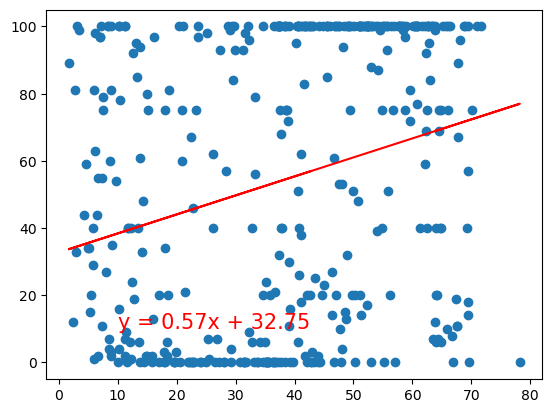

In [106]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Latitude Vs. Cloudiness Linear Regression", (10, 20))

R squared: 0.0659243450763294


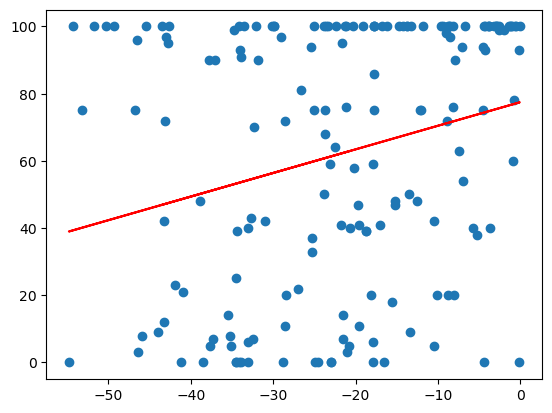

In [108]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Latitude Vs. Cloudiness Linear Regression", (10, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.015130825726164409


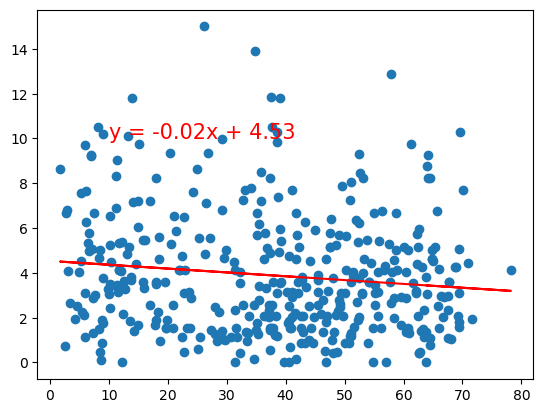

In [109]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Latitude Vs. Wind Speed Linear Regression", (10, 20))

R squared: 0.057395901565967106


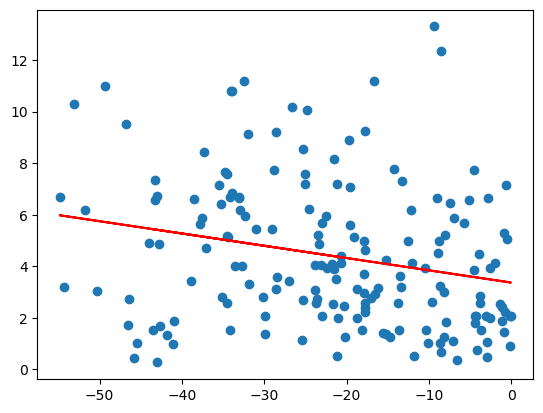

In [110]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Latitude Vs. Wind Speed Linear Regression", (10, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE